# Reliability and Data quality (1)

In [ ]:
# still to do

# Reliability and Data quality (2)

In [5]:
# Load the LOG
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime

log_df = pd.read_csv('log_sotu.csv',sep=';') # load the ;-separated log 

In [7]:
# Convert the time column 't' to datetime 
#log_df['dt'] = log_df.t.apply(datetime.datetime.fromtimestamp)
log_df['dt'] = pd.to_datetime(log_df.t,unit='s')

C:\Users\fleig\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Scraping progress')

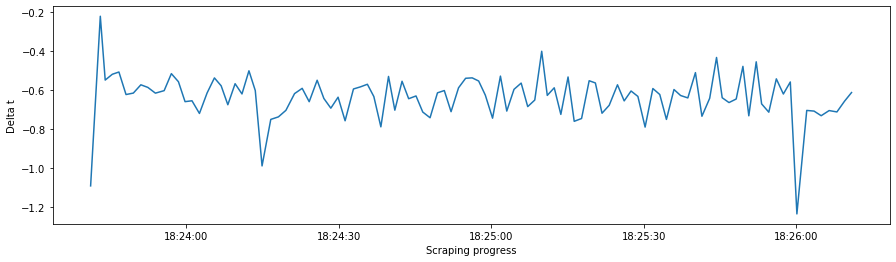

In [8]:
# Plot the time it took to make the call
plt.figure(figsize=(15,4))
plt.plot(log_df.dt,log_df.delta_t)
plt.ylabel('Delta t')
plt.xlabel('Scraping progress')

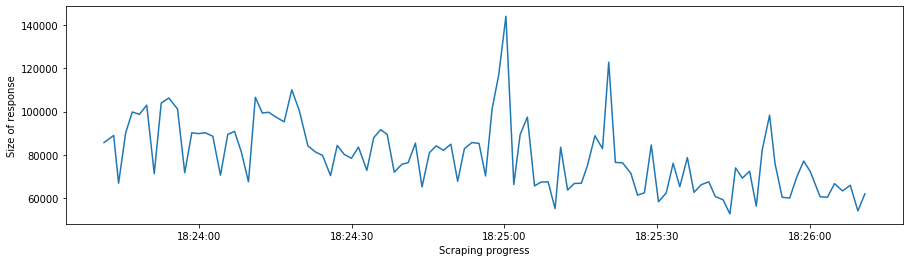

In [9]:
# Plot the response size over time.
plt.figure(figsize=(15,4))
plt.ylabel('Size of response')
plt.xlabel('Scraping progress')
plt.plot(log_df.dt,log_df.response_size)

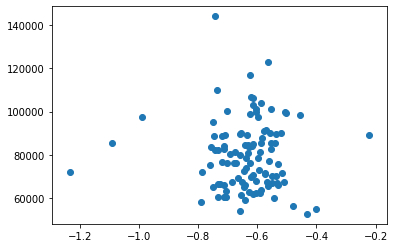

In [10]:
# Plot the delta_t against the response_size. These two should correlate pretty well.
plt.scatter(log_df.delta_t,log_df.response_size)

In [11]:
## Investigate errors
log_df.success.value_counts() ## Count errors
## Groupby time
# round the time for aggregation
log_df['dt_minute'] = log_df.dt.apply(lambda x: x-datetime.timedelta(seconds=x.second,microseconds=x.microsecond))
log_df['dt_hour'] = log_df.dt.apply(lambda x: x-datetime.timedelta(minutes=x.minute,seconds=x.second,microseconds=x.microsecond))
log_df.groupby('dt_hour').success.mean()

dt_hour
2019-08-23 18:00:00.000000012    True
2019-08-23 18:00:00.000000017    True
2019-08-23 18:00:00.000000019    True
2019-08-23 18:00:00.000000029    True
2019-08-23 18:00:00.000000030    True
2019-08-23 18:00:00.000000035    True
2019-08-23 18:00:00.000000046    True
2019-08-23 18:00:00.000000093    True
2019-08-23 18:00:00.000000096    True
2019-08-23 18:00:00.000000098    True
2019-08-23 18:00:00.000000125    True
2019-08-23 18:00:00.000000135    True
2019-08-23 18:00:00.000000142    True
2019-08-23 18:00:00.000000152    True
2019-08-23 18:00:00.000000166    True
2019-08-23 18:00:00.000000171    True
2019-08-23 18:00:00.000000180    True
2019-08-23 18:00:00.000000199    True
2019-08-23 18:00:00.000000201    True
2019-08-23 18:00:00.000000202    True
2019-08-23 18:00:00.000000210    True
2019-08-23 18:00:00.000000226    True
2019-08-23 18:00:00.000000233    True
2019-08-23 18:00:00.000000238    True
2019-08-23 18:00:00.000000243    True
2019-08-23 18:00:00.000000330    True
2019